# Práctica 1: Aprendizaje automático

__Fecha de entrega: XXX de YYY de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 333

## Apartado 3: Regresión

__Número de grupo: 19__

__Nombres de los estudiantes: Alberto Sánchez Gómez y Sara Carpio Cuenca__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('calidad_vinos.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.groupby(["quality"])["alcohol"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,9.955000,0.818009,8.4,9.725,9.925,10.575,11.0
4,53.0,10.265094,0.934776,9.0,9.600,10.000,11.000,13.1
5,681.0,9.899706,0.736521,8.5,9.400,9.700,10.200,14.9
6,638.0,10.629519,1.049639,8.4,9.800,10.500,11.300,14.0
7,199.0,11.465913,0.961933,9.2,10.800,11.500,12.100,14.0
8,18.0,12.094444,1.224011,9.8,11.325,12.150,12.875,14.0


In [6]:
df.groupby(["quality"])["pH"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,3.398000,0.144052,3.16,3.3125,3.39,3.495,3.63
4,53.0,3.381509,0.181441,2.74,3.3000,3.37,3.500,3.90
5,681.0,3.304949,0.150618,2.88,3.2000,3.30,3.400,3.74
6,638.0,3.318072,0.153995,2.86,3.2200,3.32,3.410,4.01
7,199.0,3.290754,0.150101,2.92,3.2000,3.28,3.380,3.78
8,18.0,3.267222,0.200640,2.88,3.1625,3.23,3.350,3.72


In [7]:
df.groupby(["quality"])["sulphates"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,0.570000,0.122020,0.40,0.5125,0.545,0.615,0.86
4,53.0,0.596415,0.239391,0.33,0.4900,0.560,0.600,2.00
5,681.0,0.620969,0.171062,0.37,0.5300,0.580,0.660,1.98
6,638.0,0.675329,0.158650,0.40,0.5800,0.640,0.750,1.95
7,199.0,0.741256,0.135639,0.39,0.6500,0.740,0.830,1.36
8,18.0,0.767778,0.115379,0.63,0.6900,0.740,0.820,1.10


In [8]:
df.groupby(["quality"])["citric acid"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,0.171000,0.250664,0.00,0.0050,0.035,0.3275,0.66
4,53.0,0.174151,0.201030,0.00,0.0300,0.090,0.2700,1.00
5,681.0,0.243686,0.180003,0.00,0.0900,0.230,0.3600,0.79
6,638.0,0.273824,0.195108,0.00,0.0900,0.260,0.4300,0.78
7,199.0,0.375176,0.194432,0.00,0.3050,0.400,0.4900,0.76
8,18.0,0.391111,0.199526,0.03,0.3025,0.420,0.5300,0.72


Observando los datos de la tabla, podemos ver que las variables cuya media se aleja más de los valores extremos son `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide`. Hay otras como `critic acid` o `sulphates` que también lo cumplen pero no en tan mayor medida.
Esto es debido a que los datos de estas variables tienden a un extremo más que hacia el otro extremo o hacia un punto intermedio. 
Aunque MLP puede tratar con estos valores, puede que si afecten un poco, y quizás si pueda sobreaprender en cierta medida. Pero si con un número correcto de capas y de nodos, puede que estos valores extremistas se camuflen y la red neuronal pueda tratar con ellos. Además, hay funciones de activación que nos devuelven valores entre un cierto rango, lo que permite el tratamiento de datos extremistas.

En cuanto a la calidad del vino en el conjunto de datos, podemos ver que la calidad varía entre 3 y 8. La media de la calidad está más o menos en un punto intermedio, inclinándose hacia el 3. Podemos ver con los percentiles que la gran mayoría tiene una nota de 6 o menor, ya que el percentil del 75% es 6. Aproximadamente 1300 vinos de los 1599 tienen un 5 o 6.
En función de la calidad del vino, hemos observado 4 variables y parece que los mejores vinos tienen un mayor alcohol, un menor pH, mayor cantidad de sulfitos, y mayor acido cítrico. A medida que va aumentando la calidad del vino, va aumentando o disminuyendo (dependiendo de la variable) el valor.

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

In [9]:
##### Obtenemos la tabla de correlaciones de las variables
correl = df.corrwith(df['quality']).round(3)

correl_aux = correl[abs(correl) > 0.20]
correl_aux

volatile acidity   -0.391
citric acid         0.226
sulphates           0.251
alcohol             0.476
quality             1.000
dtype: float64

Debido a que las redes neuronales no son como tal un modelo lineal, aunque veamos que las variables tienen una correlación baja, esto no implica que no estén relacionadas.

In [10]:
correl_aux.index

Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [11]:
# Usamos .index para obtener los nombres de las columnas que habíamos obtenido
df2 = df.loc[:, correl_aux.index].copy()
df2

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.700,0.00,0.56,9.4,5
1,0.880,0.00,0.68,9.8,5
2,0.760,0.04,0.65,9.8,5
3,0.280,0.56,0.58,9.8,6
4,0.700,0.00,0.56,9.4,5
...,...,...,...,...,...
1594,0.600,0.08,0.58,10.5,5
1595,0.550,0.10,0.76,11.2,6
1596,0.510,0.13,0.75,11.0,6
1597,0.645,0.12,0.71,10.2,5


### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

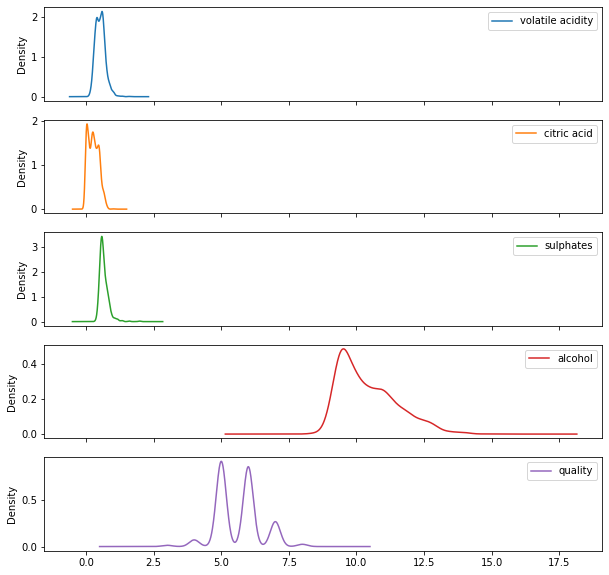

In [12]:
df2.plot(subplots = True, kind = 'density', figsize = (10,10))

Si con los gráficos no lo vemos muy claro, podemos mirar si la media, mediana y moda son iguales.

In [13]:
import statistics as sts

for column in correl_aux.index:
    print("La media de ", column, " es: ", sts.mean(df2.loc[:,column]))
    print("La mediana de ", column, " es: ", sts.median(df2.loc[:,column]))
    print("La moda de ", column, " es: ", sts.mode(df2.loc[:,column]))
    print()

La media de  volatile acidity  es:  0.5278205128205128
La mediana de  volatile acidity  es:  0.52
La moda de  volatile acidity  es:  0.6

La media de  citric acid  es:  0.2709756097560976
La mediana de  citric acid  es:  0.26
La moda de  citric acid  es:  0.0

La media de  sulphates  es:  0.6581488430268918
La mediana de  sulphates  es:  0.62
La moda de  sulphates  es:  0.6

La media de  alcohol  es:  10.422983114446529
La mediana de  alcohol  es:  10.2
La moda de  alcohol  es:  9.5

La media de  quality  es:  5.6360225140712945
La mediana de  quality  es:  6
La moda de  quality  es:  5



Aunque la media, mediana y moda es similar en todos los casos, en algunos gráficos no vemos esa forma de campana o la simetría. La mediana, media y moda es una condición necesaria para que siga una distribución normal, pero no suficiente.

Como no podemos decir que todas las variables siguen una distribución normal, vamos a escalar los datos.

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Transformamos las variables de entrada
scaler_x = MinMaxScaler()
scaler_x.fit(df2.loc[:, df2.columns != 'quality'].values)
data_scaled=scaler_x.transform(df2.loc[:, df2.columns != 'quality'].values)

target = df2['quality'].values.reshape(-1, 1)

In [52]:
data_scaled

array([[0.39726027, 0.        , 0.13772455, 0.15384615],
       [0.52054795, 0.        , 0.20958084, 0.21538462],
       [0.43835616, 0.04      , 0.19161677, 0.21538462],
       ...,
       [0.26712329, 0.13      , 0.25149701, 0.4       ],
       [0.35958904, 0.12      , 0.22754491, 0.27692308],
       [0.13013699, 0.47      , 0.19760479, 0.4       ]])

In [53]:
target

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


In [54]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [55]:
cv_scores1_mean=[]
cv_scores1_std=[]

cv_scores2_mean=[]
cv_scores2_std=[]

In [56]:
# Entrenar y validar distintas configuraciones
regul_param_range = np.array([10 ** x for x in range(-10, 11, 1)]) #array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])

In [57]:
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp1 = MLPRegressor(hidden_layer_sizes=(250, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
    mlp2 = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores1 = cross_val_score(mlp1, data_scaled, target.ravel(), cv=5, scoring='neg_mean_squared_error')
    scores2 = cross_val_score(mlp2, data_scaled, target.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores1_mean.append(scores1.mean())
    cv_scores1_std.append(scores1.std())
    
    cv_scores2_mean.append(scores2.mean())
    cv_scores2_std.append(scores2.std())


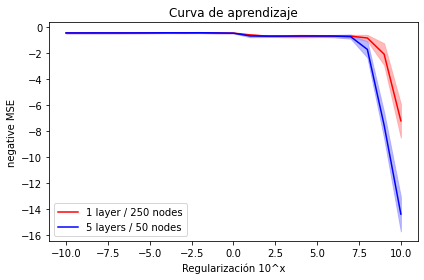

In [58]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores1_mean, color="r", label="1 layer / 250 nodes")
plt.plot(np.log10(regul_param_range), cv_scores2_mean, color="b", label="5 layers / 50 nodes")

# Dibujamos la banda de la desviación típica
lower_limit1 = np.array(cv_scores1_mean) - np.array(cv_scores1_std)
upper_limit1 = np.array(cv_scores1_mean) + np.array(cv_scores1_std)

lower_limit2 = np.array(cv_scores2_mean) - np.array(cv_scores2_std)
upper_limit2 = np.array(cv_scores2_mean) + np.array(cv_scores2_std)

plt.fill_between(np.log10(regul_param_range), lower_limit1, upper_limit1, color="#FF9999AA")
plt.fill_between(np.log10(regul_param_range), lower_limit2, upper_limit2, color="#9999FFAA")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^x"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [59]:
cv_s1_m = np.array(cv_scores1_mean)
cv_s1_m.max(), regul_param_range[cv_s1_m.argmax()]

(-0.4216807580638113, 0.0001)

In [60]:
cv_s2_m =np.array(cv_scores2_mean)
cv_s2_m.max(), regul_param_range[cv_s2_m.argmax()]

(-0.4163435798287791, 0.01)

En la gráfica podemos observar el error se minimiza en $\alpha=0.01$ para la red de una sola capa, y en $\alpha=0.00001$ para la red de varias capas. Sin embargo, ambos valores son cercanos a cero, lo que significa que apenas hay regularización y es muy probable que haya sobre aprendido.

In [61]:
cv_s1_m[11:].max(), regul_param_range[cv_s1_m[11:].argmax() + 11]

(-0.5825144824963893, 10.0)

In [62]:
cv_s2_m[11:].max(), regul_param_range[cv_s2_m[11:].argmax() + 11]

(-0.6658553746404821, 10000.0)

En el rango $[0.1, 10]$ el error aumenta a valores alrededor de $-0.027$ y, a partir de $\alpha=10$, ambas gráficas se vuelven a estabilizar. En el rango $[10, 10^{10}]$, tenemos que el error se minimiza en $\alpha=1000$ para la red neuronal de una sola capa, y en $\alpha=10$ para la red de varias capas. Con estos valores, si tenemos regularización, por lo que el aumento de una centésima en el error podría compensar el hehco de que la red no sobre aprenda.

Las gráficas de ambos perceptrones se comportan de forma similar, aunque parece haber un cierto dominio del perceptrón de varias capas ocultas sobre el perceptrón de una sola capa. Para valores de `alpha` cercanos a 0 (sin regularización), el `mlp1` (perceptrón de una sola capa) parece tener un comportamiento mucho más estable que el `mlp2` (perceptrón de varias capas), ya que la banda de desviación típica del `mlp2` prácticamente cubre la del `mlp1` en todo el rango $[10^{-10}, 0.1]$. Sin embargo, en el rango $[10, 10^{10}]$, la situación se invierte y es `mlp2` quien, no solo presenta el menor, sino también una banda de desviación bastante menor a la de `mlp1`.

Nos vamos a quedar con `mlp2` por ser este el perceptrón que presenta mejor error con regularización y una banda de desviación menor. Para `alpha` igual a 10, el MSE negativo es igual a -0.02668276962176999.

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones. 

In [31]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=10
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
# estimamos 
predicts = cross_val_predict(mlp, data_scaled, target.ravel(), cv=10)

In [32]:
predicts

array([5.58601146, 5.58784884, 5.5942877 , ..., 5.79452106, 5.76681224,
       5.83092803])

In [34]:
errors = np.abs(df2['quality'].values - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(np.array(df2['quality'].values))

print('Error absolute medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error absolute medio: 0.6668189999794775
Desviación típica: 0.431283331875371
Error medio en %: 11.831375731992726


Nuestro modelo comete un error medio de 0.69, y presenta una desviación típica de 0.43. Ambos valores me parecen 

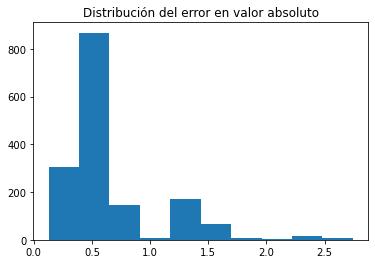

In [35]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors.reshape(-1,1))

plt.title('Distribución del error en valor absoluto')
plt.show()

Como podemos observar, la mayoría de los errores son pequeños, puesto que se ubican a la izquierda en la gráfica. Pero también encontramos 

In [36]:
df2['quality'].values

array([5, 5, 5, ..., 6, 5, 6], dtype=int64)

In [37]:
predicts

array([5.58601146, 5.58784884, 5.5942877 , ..., 5.79452106, 5.76681224,
       5.83092803])

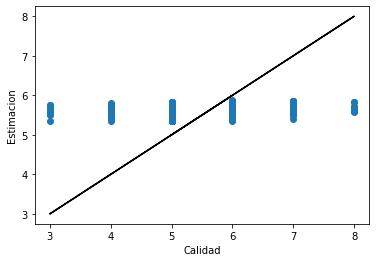

In [38]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df2['quality'].values, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df2['quality'].values, df2['quality'].values, color='k') 

plt.xlabel("Calidad")
plt.ylabel("Estimacion")
plt.show()